In [3]:
!pip install datasets pandas matplotlib seaborn wordcloud nltk

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/fa/5f/34a0c0be52dc95f96aa1197f03ad5d5c58a9901c74f050d21a3e1b21ebf9/wordcloud-1.9.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pyparsing<3.1,>=2.3.1 from https://files.pythonhosted.org/packages/6c/10/a7d0fa5baea8fe7b50f448ab742f26f52b80bfca85ac2be9d35cdd9a3246/pyparsing-3.0.9-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.2.3
    Uninstalling pyparsing-3.2.3:
      Successfully uninstalled pyparsing-3.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aider-chat 0.86.1 requires pyparsing==3.2.3, but you have pyparsing 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

1. LOAD THE DATASET

In [28]:
print("\n" + "="*80)
print("Loading Alpaca Dataset from Hugging Face...")
print("="*80)

# Load the dataset
dataset = load_dataset("tatsu-lab/alpaca")

print(f"\nDataset loaded successfully!")
print(f"  Total samples: {len(dataset['train']):,}")


Loading Alpaca Dataset from Hugging Face...

Dataset loaded successfully!
  Total samples: 52,002


In [29]:
print("\n" + "="*80)
print("Dataset Structure")
print("="*80)

# Show dataset info
print("\nDataset splits:")
print(dataset)

print("\nColumn names:")
print(dataset['train'].column_names)

print("\nFirst example:")
print("-" * 80)
first_example = dataset['train'][0]
for key, value in first_example.items():
    print(f"{key}:")
    print(f"  {value}")
    print()


Dataset Structure

Dataset splits:
DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output', 'text'],
        num_rows: 52002
    })
})

Column names:
['instruction', 'input', 'output', 'text']

First example:
--------------------------------------------------------------------------------
instruction:
  Give three tips for staying healthy.

input:
  

output:
  1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. 
2. Exercise regularly to keep your body active and strong. 
3. Get enough sleep and maintain a consistent sleep schedule.

text:
  Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
Give three tips for staying healthy.

### Response:
1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. 
2. Exercise regularly to keep your body active and strong. 
3. Get enough sleep and maintain a consistent sleep schedule.



In [30]:
# Convert to pandas for easier analysis
df = pd.DataFrame(dataset['train'])

print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
df.head()

Shape: (52002, 4)
Columns: ['instruction', 'input', 'output', 'text']


,instruction,input,output,text
0,Give three tips for staying healthy.,,1.Eat a balanced diet and make sure to include...,Below is an instruction that describes a task....
1,What are the three primary colors?,,"The three primary colors are red, blue, and ye...",Below is an instruction that describes a task....
2,Describe the structure of an atom.,,"An atom is made up of a nucleus, which contain...",Below is an instruction that describes a task....
3,How can we reduce air pollution?,,There are a number of ways to reduce air pollu...,Below is an instruction that describes a task....
4,Describe a time when you had to make a difficu...,,I had to make a difficult decision when I was ...,Below is an instruction that describes a task....


### Basic Statistics

In [31]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
instruction    0
input          0
output         0
text           0
dtype: int64


In [32]:
# Check for empty strings
print("\nEmpty string analysis:")
print(f"   Empty instructions: {(df['instruction'] == '').sum()}")
print(f"   Empty inputs: {(df['input'] == '').sum()}")
print(f"   Empty outputs: {(df['output'] == '').sum()}")


Empty string analysis:
   Empty instructions: 0
   Empty inputs: 31323
   Empty outputs: 28


In [33]:
# Calculate text lengths
df['instruction_length'] = df['instruction'].str.len()
df['input_length'] = df['input'].str.len()
df['output_length'] = df['output'].str.len()

In [34]:
# Word counts
df['instruction_words'] = df['instruction'].str.split().str.len()
df['input_words'] = df['input'].str.split().str.len()
df['output_words'] = df['output'].str.split().str.len()

In [35]:
# Text Length Statistics (characters)
print(df[['instruction_length', 'input_length', 'output_length']].describe())

       instruction_length  input_length  output_length
count        52002.000000  52002.000000   52002.000000
mean            59.778759     22.914811     270.312334
std             21.193591     57.513534     275.025960
min              9.000000      0.000000       0.000000
25%             46.000000      0.000000      53.000000
50%             57.000000      0.000000     185.000000
75%             70.000000     27.000000     423.000000
max            489.000000   2467.000000    4181.000000


In [36]:
# Word Count Statistics
print(df[['instruction_words', 'input_words', 'output_words']].describe())

       instruction_words   input_words  output_words
count       52002.000000  52002.000000  52002.000000
mean           10.063632      3.935637     44.182858
std             3.628237      9.490716     44.974091
min             4.000000      0.000000      0.000000
25%             8.000000      0.000000      9.000000
50%            10.000000      0.000000     30.000000
75%            12.000000      5.000000     69.000000
max            84.000000    402.000000    717.000000


In [37]:
# Samples with and without input text

has_input = (df['input'].str.len() > 0).sum()
no_input = (df['input'].str.len() == 0).sum()

print(f"\nSamples with input text: {has_input:,} ({has_input/len(df)*100:.1f}%)")
print(f"Samples without input text: {no_input:,} ({no_input/len(df)*100:.1f}%)")


Samples with input text: 20,679 (39.8%)
Samples without input text: 31,323 (60.2%)


### Visualization


Creating Visualizations...

Visualization saved as 'alpaca_statistics.png'


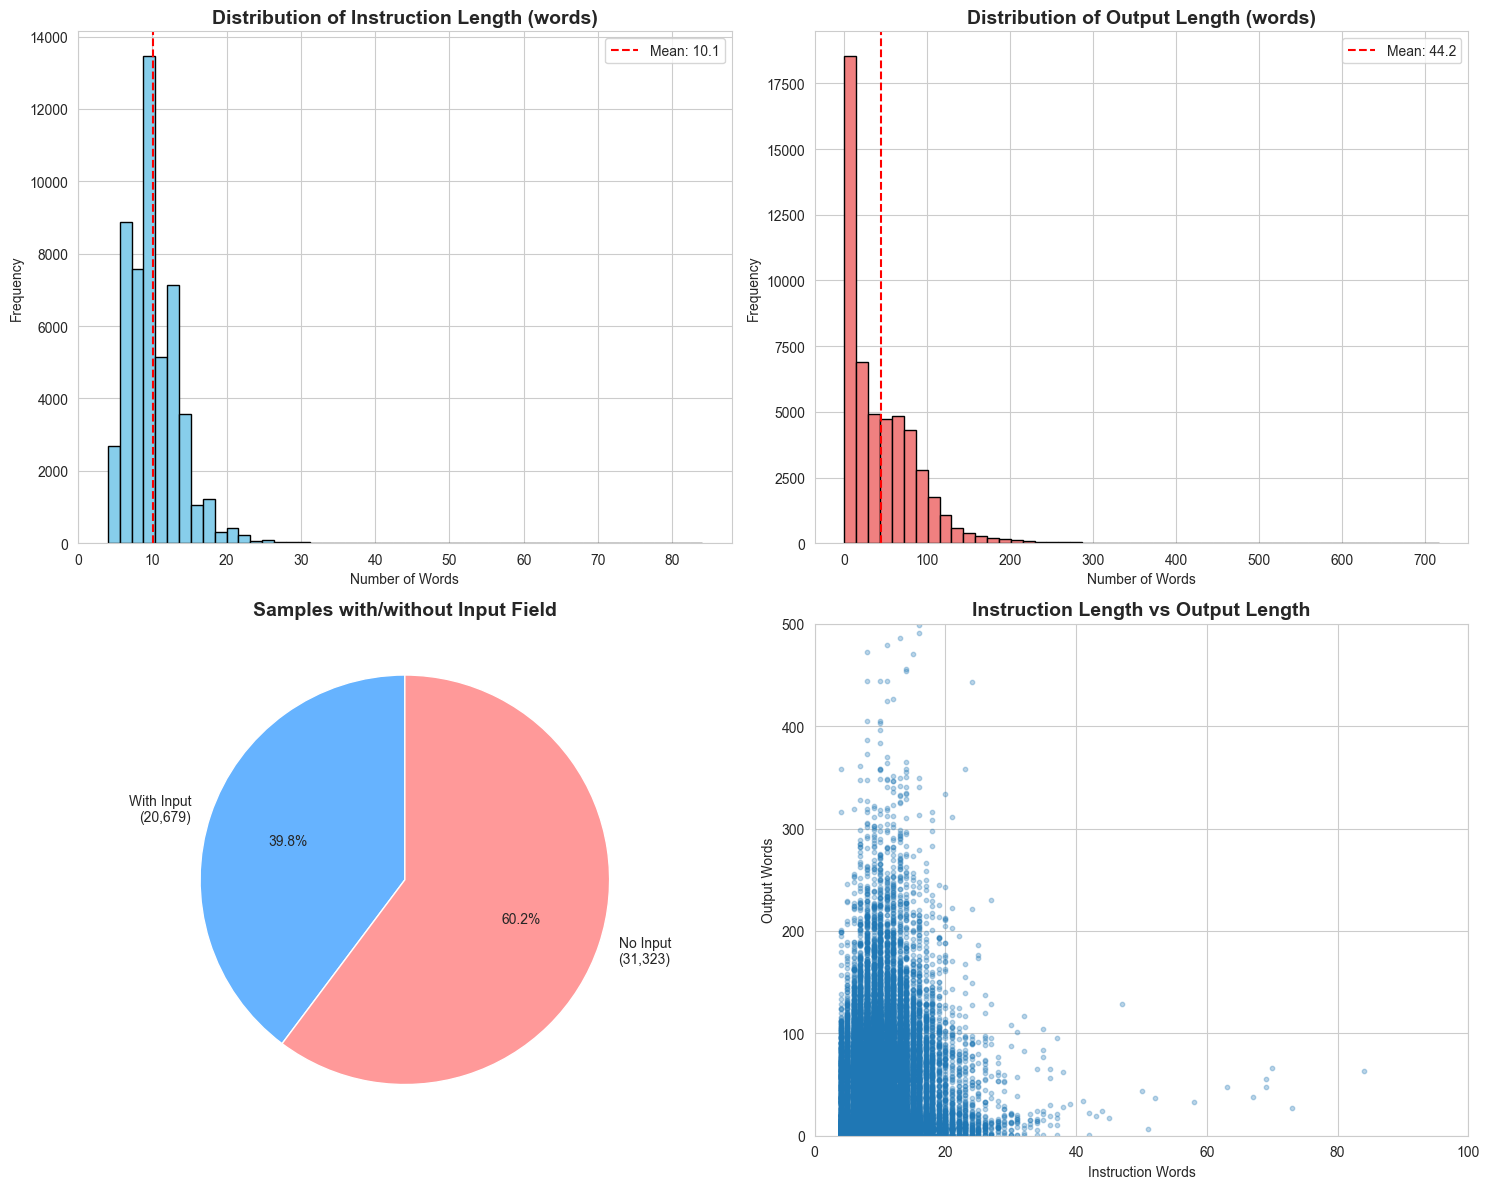

In [38]:
print("\n" + "="*80)
print("Creating Visualizations...")
print("="*80)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of instruction lengths
axes[0, 0].hist(df['instruction_words'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Instruction Length (words)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['instruction_words'].mean(), color='red', linestyle='--', label=f'Mean: {df["instruction_words"].mean():.1f}')
axes[0, 0].legend()

# 2. Distribution of output lengths
axes[0, 1].hist(df['output_words'], bins=50, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Output Length (words)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['output_words'].mean(), color='red', linestyle='--', label=f'Mean: {df["output_words"].mean():.1f}')
axes[0, 1].legend()

# 3. Input vs No Input
input_counts = [has_input, no_input]
input_labels = [f'With Input\n({has_input:,})', f'No Input\n({no_input:,})']
colors = ['#66b3ff', '#ff9999']
axes[1, 0].pie(input_counts, labels=input_labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Samples with/without Input Field', fontsize=14, fontweight='bold')

# 4. Scatter plot: Instruction length vs Output length
axes[1, 1].scatter(df['instruction_words'], df['output_words'], alpha=0.3, s=10)
axes[1, 1].set_title('Instruction Length vs Output Length', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Instruction Words')
axes[1, 1].set_ylabel('Output Words')
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 500)

plt.tight_layout()
plt.savefig('alpaca_statistics.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'alpaca_statistics.png'")
plt.show()


In [39]:
print("\n" + "="*80)
print("Sample Examples")
print("="*80)

# Show examples with and without input
print("\nExample WITH input field:")
print("-" * 80)
with_input = df[df['input'].str.len() > 0].iloc[0]
print(f"Instruction: {with_input['instruction']}")
print(f"Input: {with_input['input']}")
print(f"Output: {with_input['output'][:200]}...")

print("\nExample WITHOUT input field:")
print("-" * 80)
without_input = df[df['input'].str.len() == 0].iloc[0]
print(f"Instruction: {without_input['instruction']}")
print(f"Output: {without_input['output'][:200]}...")


Sample Examples

Example WITH input field:
--------------------------------------------------------------------------------
Instruction: Identify the odd one out.
Input: Twitter, Instagram, Telegram
Output: Telegram...

Example WITHOUT input field:
--------------------------------------------------------------------------------
Instruction: Give three tips for staying healthy.
Output: 1.Eat a balanced diet and make sure to include plenty of fruits and vegetables. 
2. Exercise regularly to keep your body active and strong. 
3. Get enough sleep and maintain a consistent sleep schedul...



Word Frequency Analysis

Top 20 most common words in instructions:
   the: 42,510
   a: 35,961
   of: 20,266
   to: 12,257
   in: 9,220
   for: 7,901
   following: 7,369
   given: 7,255
   and: 6,917
   an: 6,318
   that: 5,441
   generate: 5,128
   sentence: 4,821
   is: 4,598
   create: 4,291
   list: 3,983
   describe: 3,539
   what: 3,449
   with: 3,331
   write: 3,096

Word cloud saved as 'alpaca_wordcloud.png'


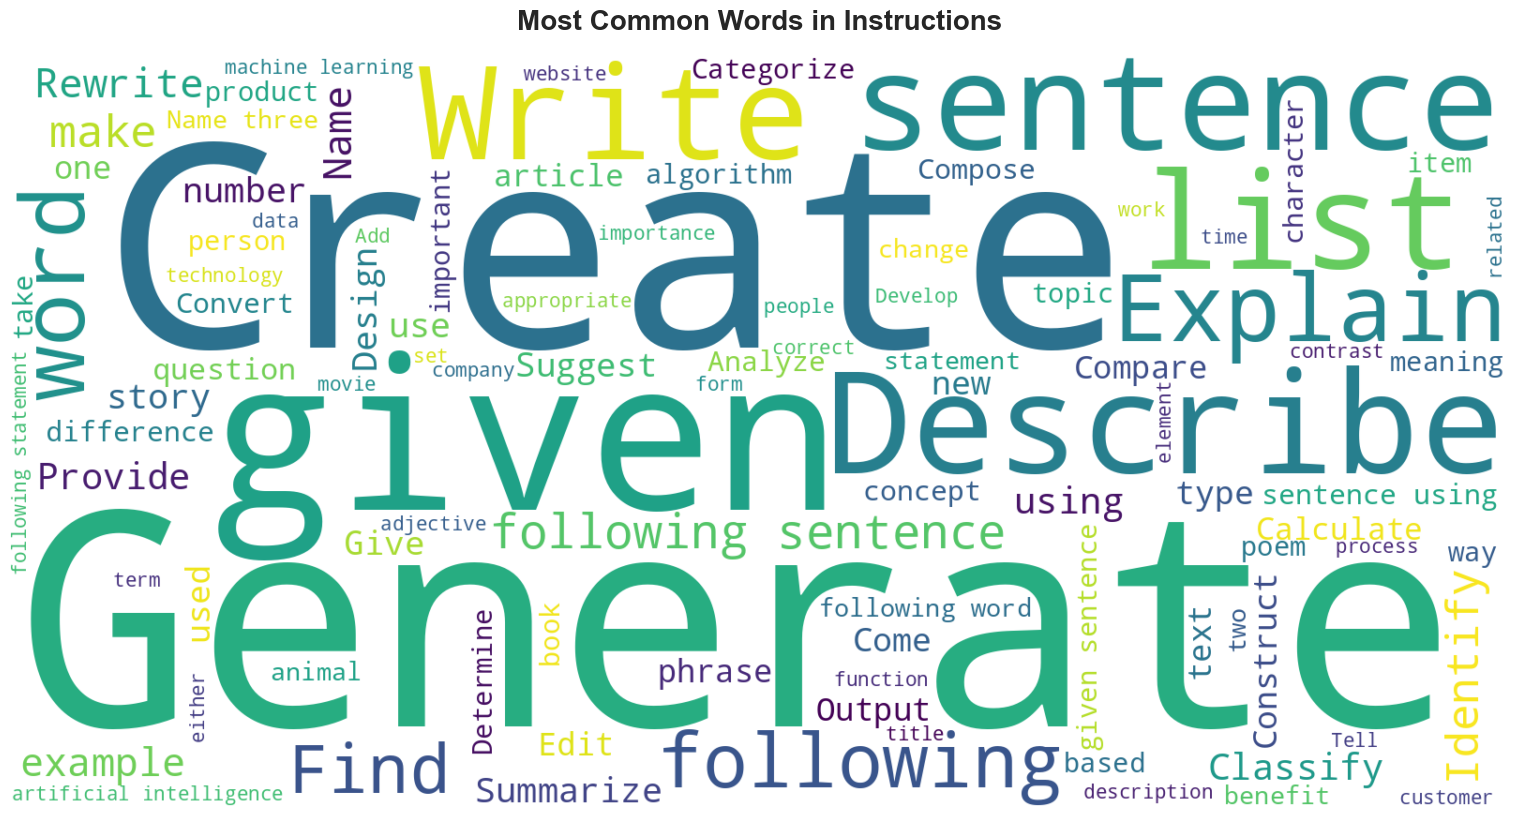

In [40]:
print("\n" + "="*80)
print("Word Frequency Analysis")
print("="*80)

# Get all words from instructions
all_instruction_words = ' '.join(df['instruction'].tolist()).lower().split()
instruction_word_freq = Counter(all_instruction_words)

print("\nTop 20 most common words in instructions:")
for word, count in instruction_word_freq.most_common(20):
    print(f"   {word}: {count:,}")

# Create word cloud
plt.figure(figsize=(15, 8))
wordcloud = WordCloud(width=1600, height=800, background_color='white', 
                      colormap='viridis', max_words=100).generate(' '.join(df['instruction']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Instructions', fontsize=20, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.savefig('alpaca_wordcloud.png', dpi=300, bbox_inches='tight')
print("\nWord cloud saved as 'alpaca_wordcloud.png'")
plt.show()

In [41]:
print("\n" + "="*80)
print("Exporting Sample Data")
print("="*80)

# Save a sample to CSV for further analysis
sample_df = df.sample(n=100, random_state=42)
sample_df.to_csv('alpaca_sample_100.csv', index=False)
print("\nSaved 100 random samples to 'alpaca_sample_100.csv'")

# Save statistics summary
stats_summary = {
    'Total Samples': len(df),
    'Samples with Input': has_input,
    'Samples without Input': no_input,
    'Avg Instruction Length (words)': df['instruction_words'].mean(),
    'Avg Input Length (words)': df['input_words'].mean(),
    'Avg Output Length (words)': df['output_words'].mean(),
    'Max Output Length (words)': df['output_words'].max(),
    'Min Output Length (words)': df['output_words'].min(),
}

stats_df = pd.DataFrame([stats_summary])
stats_df.to_csv('alpaca_statistics_summary.csv', index=False)
print("Saved statistics summary to 'alpaca_statistics_summary.csv'")

# ============================================================================
# Summary Report
# ============================================================================
print("\n" + "="*80)
print("ALPACA DATASET EXPLORATION SUMMARY")
print("="*80)

print(f"""
Dataset Overview:
• Total samples: {len(df):,}
• Samples with input field: {has_input:,} ({has_input/len(df)*100:.1f}%)
• Samples without input field: {no_input:,} ({no_input/len(df)*100:.1f}%)

Average Lengths:
• Instruction: {df['instruction_words'].mean():.1f} words ({df['instruction_length'].mean():.0f} chars)
• Input: {df['input_words'].mean():.1f} words ({df['input_length'].mean():.0f} chars)
• Output: {df['output_words'].mean():.1f} words ({df['output_length'].mean():.0f} chars)

Output Length Range:
• Shortest: {df['output_words'].min()} words
• Longest: {df['output_words'].max()} words
• Median: {df['output_words'].median():.0f} words

Key Insights:
• The dataset contains {len(df):,} instruction-response pairs
• About {no_input/len(df)*100:.0f}% of samples don't require additional input context
• Average output is {df['output_words'].mean():.0f} words, suitable for instruction-following tasks
• This dataset is ideal for training models to follow instructions and generate helpful responses

Files Generated:
• alpaca_statistics.png - Visual analysis charts
• alpaca_wordcloud.png - Word cloud of common instruction terms
• alpaca_sample_100.csv - 100 random samples for review
• alpaca_statistics_summary.csv - Statistical summary

Exploration complete! You can now use this dataset for fine-tuning your model.
""")

print("="*80)


Exporting Sample Data

Saved 100 random samples to 'alpaca_sample_100.csv'
Saved statistics summary to 'alpaca_statistics_summary.csv'

ALPACA DATASET EXPLORATION SUMMARY

Dataset Overview:
• Total samples: 52,002
• Samples with input field: 20,679 (39.8%)
• Samples without input field: 31,323 (60.2%)

Average Lengths:
• Instruction: 10.1 words (60 chars)
• Input: 3.9 words (23 chars)
• Output: 44.2 words (270 chars)

Output Length Range:
• Shortest: 0 words
• Longest: 717 words
• Median: 30 words

Key Insights:
• The dataset contains 52,002 instruction-response pairs
• About 60% of samples don't require additional input context
• Average output is 44 words, suitable for instruction-following tasks
• This dataset is ideal for training models to follow instructions and generate helpful responses

Files Generated:
• alpaca_statistics.png - Visual analysis charts
• alpaca_wordcloud.png - Word cloud of common instruction terms
• alpaca_sample_100.csv - 100 random samples for review
• alpa